In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
!pip install --upgrade scikit-learn

!pip install --user --upgrade bottleneck


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('stackflow_data.csv')

In [3]:
df.head(2)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0


## Data cleaning

In [4]:
# rename columns

df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df = df.rename ({'RemoteWork': 'Worktype'}, axis=1)

In [5]:
# Select only rows where Salary is not null
df = df[df['Salary'].notnull()]

In [6]:
df.head(2)

,ResponseId,Q120,MainBranch,Age,Employment,Worktype,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,Salary
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


In [7]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'Worktype',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantT

### Select relevant features

In [8]:
df = df[['Age', 'EdLevel', 'MainBranch', 'DevType', 'Country', 'Industry', 'Employment', 'OrgSize', 
       'WorkExp', 'Worktype', 'YearsCode', 'YearsCodePro', 'Salary' ]]

In [9]:
df.head(2)

,Age,EdLevel,MainBranch,DevType,Country,Industry,Employment,OrgSize,WorkExp,Worktype,YearsCode,YearsCodePro,Salary
1,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,"Senior Executive (C-Suite, VP, etc.)",United States of America,"Information Services, IT, Software Development...","Employed, full-time",2 to 9 employees,10.0,Remote,18,9,285000.0
2,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,"Developer, back-end",United States of America,"Information Services, IT, Software Development...","Employed, full-time","5,000 to 9,999 employees",23.0,"Hybrid (some remote, some in-person)",27,23,250000.0


In [10]:
df.shape

(48019, 13)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   MainBranch    48019 non-null  object 
 3   DevType       47904 non-null  object 
 4   Country       48019 non-null  object 
 5   Industry      27747 non-null  object 
 6   Employment    48007 non-null  object 
 7   OrgSize       47982 non-null  object 
 8   WorkExp       32638 non-null  float64
 9   Worktype      47940 non-null  object 
 10  YearsCode     47950 non-null  object 
 11  YearsCodePro  47825 non-null  object 
 12  Salary        48019 non-null  float64
dtypes: float64(2), object(11)
memory usage: 5.1+ MB


In [12]:
# Check why 'YearsCode' and 'YearsCodePro' has Dtype object  

df['YearsCode'].value_counts()

YearsCode
10                    3979
15                    2993
8                     2759
20                    2732
7                     2466
12                    2364
6                     2188
5                     2086
9                     1896
13                    1869
25                    1730
11                    1703
14                    1638
4                     1364
16                    1360
30                    1281
18                    1225
17                    1113
3                     1047
23                     910
22                     816
40                     710
24                     683
35                     641
19                     606
21                     531
2                      519
26                     495
27                     480
28                     459
33                     306
32                     289
38                     271
34                     217
29                     216
42                     213
37                

In [13]:
df['YearsCodePro'].value_counts()

YearsCodePro
5                     3665
10                    3416
2                     3215
3                     3191
4                     2976
6                     2804
7                     2736
8                     2698
15                    1946
12                    1804
1                     1788
9                     1667
11                    1578
20                    1427
13                    1275
Less than 1 year      1218
16                     947
14                     941
25                     897
18                     882
17                     826
23                     773
22                     574
30                     529
24                     468
19                     438
21                     384
26                     324
27                     318
28                     287
35                     279
32                     178
33                     163
40                     159
29                     156
36                     120
31             

In [14]:
# convert the strings in both columns to int.


df.loc[df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = '0'  

df.loc[df['YearsCode'] == 'More than 50 years', 'YearsCode'] = '51'


df['YearsCode'].value_counts().tail(10)

YearsCode
39    147
41    146
51    103
44     91
0      69
46     52
48     43
50     42
47     40
49     21
Name: count, dtype: int64

In [15]:
df.loc[df['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = '0'  

df.loc[df['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = '51'


df['YearsCodePro'].value_counts().tail(10)


YearsCodePro
42    43
41    42
51    38
43    36
46    19
44    18
47    14
50    11
48    10
49     6
Name: count, dtype: int64

In [16]:
df.isnull().sum()

Age                 0
EdLevel             0
MainBranch          0
DevType           115
Country             0
Industry        20272
Employment         12
OrgSize            37
WorkExp         15381
Worktype           79
YearsCode          69
YearsCodePro      194
Salary              0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   MainBranch    48019 non-null  object 
 3   DevType       47904 non-null  object 
 4   Country       48019 non-null  object 
 5   Industry      27747 non-null  object 
 6   Employment    48007 non-null  object 
 7   OrgSize       47982 non-null  object 
 8   WorkExp       32638 non-null  float64
 9   Worktype      47940 non-null  object 
 10  YearsCode     47950 non-null  object 
 11  YearsCodePro  47825 non-null  object 
 12  Salary        48019 non-null  float64
dtypes: float64(2), object(11)
memory usage: 5.1+ MB


### Filling missing values with median

In [18]:
from sklearn.impute import SimpleImputer

# list of numerical columns
numeric_columns = ['WorkExp', 'YearsCode','YearsCodePro']

# Impute numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# List of categorical columns
categorical_columns = ['DevType','Industry', 'Employment', 'OrgSize', 'WorkExp', 'Worktype']

# Initialize an empty dictionary to store median values for each column
median_values = {}

# Loop through each categorical column
for column in categorical_columns:
    # Calculate the count of each category
    category_counts = df[column].value_counts()

    # Find the median category based on the counts
    median_category = category_counts.idxmax()

    # Store the median category in the dictionary
    median_values[column] = median_category

    # Fill missing values in each column with the respective median category
    df[column].fillna(median_category, inplace=True)



In [19]:
df.isnull().sum()

Age             0
EdLevel         0
MainBranch      0
DevType         0
Country         0
Industry        0
Employment      0
OrgSize         0
WorkExp         0
Worktype        0
YearsCode       0
YearsCodePro    0
Salary          0
dtype: int64

In [20]:
# convert 'YearsCode' and 'YearsCodePro' column to int data type

df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce').astype('Int64')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').astype('Int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   MainBranch    48019 non-null  object 
 3   DevType       48019 non-null  object 
 4   Country       48019 non-null  object 
 5   Industry      48019 non-null  object 
 6   Employment    48019 non-null  object 
 7   OrgSize       48019 non-null  object 
 8   WorkExp       48019 non-null  float64
 9   Worktype      48019 non-null  object 
 10  YearsCode     48019 non-null  Int64  
 11  YearsCodePro  48019 non-null  Int64  
 12  Salary        48019 non-null  float64
dtypes: Int64(2), float64(2), object(9)
memory usage: 5.2+ MB


In [22]:
# Numerical statistics

df.describe()

,WorkExp,YearsCode,YearsCodePro,Salary
count,48019.000000,48019.0,48019.0,4.801900e+04
mean,10.657552,15.664216,10.735292,1.031101e+05
std,7.361744,9.871297,8.670252,6.814188e+05
min,0.000000,0.0,0.0,1.000000e+00
25%,7.000000,8.0,4.0,4.390700e+04
50%,9.000000,13.0,8.0,7.496300e+04
75%,12.000000,20.0,15.0,1.216410e+05
max,50.000000,51.0,51.0,7.435143e+07


In [23]:
#Categorical statistics

df.describe(include=["object", "bool"])

,Age,EdLevel,MainBranch,DevType,Country,Industry,Employment,OrgSize,Worktype
count,48019,48019,48019,48019,48019,48019,48019,48019,48019
unique,8,8,2,33,171,12,14,10,3
top,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,"Developer, full-stack",United States of America,"Information Services, IT, Software Development...","Employed, full-time",20 to 99 employees,Remote
freq,22163,22540,44354,17175,11881,33741,39313,10347,21217


In [24]:
# Investigating individual features

df["Age"].value_counts()

Age
25-34 years old       22163
35-44 years old       13848
18-24 years old        4922
45-54 years old        4866
55-64 years old        1795
65 years or older       339
Under 18 years old       56
Prefer not to say        30
Name: count, dtype: int64

#### Group smaller age category into others


In [25]:
def Shorten_categories(categories, cutoff):
    Age_cat_map = {}
    for i in range (len(categories)):
        if categories.values[i] >= cutoff:
            Age_cat_map[categories.index[i]] = categories.index[i]
        else:
            Age_cat_map[categories.index[i]] = "others"
    return Age_cat_map
    

In [26]:
Age_map = Shorten_categories(df.Age.value_counts(), 1500)
df['Age'] = df['Age'].map(Age_map)

In [27]:
df["Age"].value_counts()

Age
25-34 years old    22163
35-44 years old    13848
18-24 years old     4922
45-54 years old     4866
55-64 years old     1795
others               425
Name: count, dtype: int64

In [28]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          22540
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13045
Some college/university study without earning a degree                                 5654
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2297
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2169
Associate degree (A.A., A.S., etc.)                                                    1596
Something else                                                                          496
Primary/elementary school                                                               222
Name: count, dtype: int64

In [29]:
def Education_level(x):
    if 'Bachelor’s degree' in x:
        return 'B.Sc'
    if 'Master’s degree' in x:
        return 'M.Sc'
    if 'Professional degree' in x:
        return 'Ph.d'
    return 'less than a Bachelors'
df['EdLevel'] = df['EdLevel'].apply(Education_level)

In [30]:
df['EdLevel'].unique()

array(['B.Sc', 'less than a Bachelors', 'M.Sc', 'Ph.d'], dtype=object)

In [31]:
df['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies'],
      dtype=object)

In [32]:
def profession(x):
    if 'I am a developer by profession' in x:
        return 'professional Dev'
    return 'Not a pro Dev'
df['MainBranch'] = df['MainBranch'].apply(profession)

In [33]:
df['MainBranch'].unique()

array(['professional Dev', 'Not a pro Dev'], dtype=object)

In [34]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            17175
Developer, back-end                               9557
Developer, front-end                              3271
Developer, desktop or enterprise applications     2435
Developer, mobile                                 1646
Other (please specify):                           1493
Engineering manager                               1311
Developer, embedded applications or devices       1267
Data scientist or machine learning specialist      992
DevOps specialist                                  982
Engineer, data                                     904
Research & Development role                        827
Senior Executive (C-Suite, VP, etc.)               776
Cloud infrastructure engineer                      766
Academic researcher                                615
Developer, game or graphics                        491
Data or business analyst                           450
Developer, QA or test                              360
Sy

In [35]:


def shorten_devtype (devtype, cutoff):
    devtype_map = {}
    for i in range(len(devtype)):
        if devtype.values[i] >= cutoff:
            devtype_map[devtype.index[i]] = devtype.index[i]
        else:
            devtype_map[devtype.index[i]] = 'others'
    return devtype_map
    

In [36]:
devtype_map = shorten_devtype(df.DevType.value_counts(), 400)
df['DevType'] = df['DevType'].map(devtype_map)

In [37]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            17175
Developer, back-end                               9557
Developer, front-end                              3271
others                                            3061
Developer, desktop or enterprise applications     2435
Developer, mobile                                 1646
Other (please specify):                           1493
Engineering manager                               1311
Developer, embedded applications or devices       1267
Data scientist or machine learning specialist      992
DevOps specialist                                  982
Engineer, data                                     904
Research & Development role                        827
Senior Executive (C-Suite, VP, etc.)               776
Cloud infrastructure engineer                      766
Academic researcher                                615
Developer, game or graphics                        491
Data or business analyst                           450
Na

In [38]:
def Dev_type(x):
    if 'full-stack' in x:
        return 'full-stack'
    if 'back-end' in x:
        return 'back-end'
    if 'front-end' in x:
        return 'front-end'
    if  'desktop or enterprise applications' in x:
        return 'desktop/enterprise app'
    if 'mobile' in x:
        return 'mobile'
    if 'Engineering manager' in x:
        return 'Engineering manager'
    if 'embedded applications or devices' in x:
        return 'embedded applications'
    if 'DevOps specialist' in x:
        return 'DevOps specialist'
    if 'Data scientist' in x:
        return 'Data scientist'
    if 'Engineer, data' in x:
        return 'Data engineer'
    if 'Cloud infrastructure engineer' in x:
        return 'Cloud engineer'
    
    return 'others'
df['DevType'] = df['DevType'].apply(Dev_type)

In [39]:
df['DevType'].value_counts()

DevType
full-stack                17175
back-end                   9557
others                     7713
front-end                  3271
desktop/enterprise app     2435
mobile                     1646
Engineering manager        1311
embedded applications      1267
Data scientist              992
DevOps specialist           982
Data engineer               904
Cloud engineer              766
Name: count, dtype: int64

In [40]:
df['Country'].value_counts()

Country
United States of America                                11881
Germany                                                  3970
United Kingdom of Great Britain and Northern Ireland     3544
Canada                                                   2105
India                                                    1868
                                                        ...  
Gabon                                                       1
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64

In [41]:
 
def shorten_cat (country_cat, cutoff):
    categorical_map = {}
    for i in range(len(country_cat)):
        if country_cat.values[i] >= cutoff:
            categorical_map[country_cat.index[i]] = country_cat.index[i]
        else:
            categorical_map[country_cat.index[i]] = 'others'
    return categorical_map
    

In [42]:
categorical_map = shorten_cat(df.Country.value_counts(), 400)

df['Country'] = df['Country'].map(categorical_map)


In [43]:
df['Country'].value_counts()

Country
United States of America                                11881
others                                                   8351
Germany                                                  3970
United Kingdom of Great Britain and Northern Ireland     3544
Canada                                                   2105
India                                                    1868
France                                                   1801
Netherlands                                              1362
Poland                                                   1266
Brazil                                                   1252
Australia                                                1211
Spain                                                    1150
Sweden                                                   1056
Italy                                                    1012
Switzerland                                               662
Austria                                                   531


In [44]:
df['Industry'].value_counts()

Industry
Information Services, IT, Software Development, or other Technology    33741
Financial Services                                                      3441
Other                                                                   3013
Manufacturing, Transportation, or Supply Chain                          2001
Healthcare                                                              1702
Retail and Consumer Services                                            1552
Higher Education                                                         867
Advertising Services                                                     615
Insurance                                                                575
Oil & Gas                                                                207
Legal Services                                                           169
Wholesale                                                                136
Name: count, dtype: int64

In [45]:
def Industry_cat(x):
    if 'Information Services' in x:
        return 'IT'
    if 'Financial Services' in x:
        return 'Finance'
    if 'Manufacturing' in x:
        return 'supply chain'
    if  'Healthcare' in x:
        return 'Healthcare'
    if 'Retail and Consumer Services' in x:
        return 'Retail'
    if 'Higher Education' in x:
        return 'Education'
    if 'Insurance' in x:
        return 'Insurance'
    if 'Advertising Services' in x:
        return 'Advertising'
    
    return 'others'
df['Industry'] = df['Industry'].apply(Industry_cat)

In [46]:
df['Industry'].value_counts()

Industry
IT              33741
others           3525
Finance          3441
supply chain     2001
Healthcare       1702
Retail           1552
Education         867
Advertising       615
Insurance         575
Name: count, dtype: int64

In [47]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                             39313
Independent contractor, freelancer, or self-employed                                             3906
Employed, full-time;Independent contractor, freelancer, or self-employed                         3291
Employed, part-time                                                                               906
Independent contractor, freelancer, or self-employed;Employed, part-time                          240
Employed, full-time;Employed, part-time                                                           154
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
I prefer not to say                                                                                34
Retired                                                                                            33
Independent contractor, freelancer, or self-employed;Retired           

In [48]:
def Employment_type (x):
    if 'Employed, full-time' in x:
        return 'full-time'
    if 'Independent contractor' in x:
        return 'Contract'
    if 'part-time' in x:
        return 'part-time'
    return 'others'
df['Employment'] = df['Employment'].apply(Employment_type)

In [49]:
df['Employment'].value_counts()

Employment
full-time    42878
Contract      4164
part-time      910
others          67
Name: count, dtype: int64

In [50]:
df['OrgSize'].value_counts()

OrgSize
20 to 99 employees                                    10347
100 to 499 employees                                   9518
10,000 or more employees                               6099
1,000 to 4,999 employees                               5702
2 to 9 employees                                       4318
10 to 19 employees                                     3886
500 to 999 employees                                   3450
5,000 to 9,999 employees                               2063
Just me - I am a freelancer, sole proprietor, etc.     2054
I don’t know                                            582
Name: count, dtype: int64

In [51]:
def OrgSize_cat (x):
    if '20 to 99 employees' in x:
        return '20 to 99'
    if '100 to 499 employees' in x:
        return '100 to 499'
    if '10,000 or more employees' in x:
        return '10,000 & above'
    if '1,000 to 4,999 employees' in x:
        return '1,000 to 4,999'
    if '2 to 9 employees' in x:
        return '2 to 9'
    if '10 to 19 employees' in x:
        return '10 to 19'
    if '500 to 999 employees' in x:
        return '500 to 999'
    if '5,000 to 9,999 employees' in x:
        return '5,000 to 9,999'
    return 'others'
df['OrgSize'] =  df['OrgSize'].apply(OrgSize_cat )

In [52]:
df['OrgSize'].value_counts()

OrgSize
20 to 99          10347
100 to 499         9518
10,000 & above     6099
1,000 to 4,999     5702
2 to 9             4318
10 to 19           3886
500 to 999         3450
others             2636
5,000 to 9,999     2063
Name: count, dtype: int64

In [53]:
def workexp_cat(x):
    if x <= 5:
        return '0 to 5'
    if x <= 10:
        return '6 to 10'
    if x <= 15:
        return '11 to 15'
    if x <= 20:
        return '16 to 20'
    if x <= 25:
        return '21 to 25'
    if x <= 30:
        return '26 to 30'
    
    return '31 & above'
df['WorkExp'] = df['WorkExp'].apply(workexp_cat)

In [54]:
df['WorkExp'].value_counts()

WorkExp
6 to 10       24379
0 to 5         9842
11 to 15       5603
16 to 20       3397
21 to 25       2362
31 & above     1253
26 to 30       1183
Name: count, dtype: int64

In [55]:
df['Worktype'].value_counts()

Worktype
Remote                                  21217
Hybrid (some remote, some in-person)    20276
In-person                                6526
Name: count, dtype: int64

In [56]:
def Worktype_cat (x):
    if 'Remote' in x:
        return 'Remote'
    if 'Hybrid' in x:
        return 'Hybrid'
    return 'Onsite'
df['Worktype'] = df['Worktype'].apply(Worktype_cat)

In [57]:
df['Worktype'].value_counts()

Worktype
Remote    21217
Hybrid    20276
Onsite     6526
Name: count, dtype: int64

In [58]:
df.head(2)


,Age,EdLevel,MainBranch,DevType,Country,Industry,Employment,OrgSize,WorkExp,Worktype,YearsCode,YearsCodePro,Salary
1,25-34 years old,B.Sc,professional Dev,others,United States of America,IT,full-time,2 to 9,6 to 10,Remote,18,9,285000.0
2,45-54 years old,B.Sc,professional Dev,back-end,United States of America,IT,full-time,"5,000 to 9,999",21 to 25,Hybrid,27,23,250000.0


In [59]:
# column to calculate the average time taken to start coding professionally

df['Avgcodepro_time'] = df['YearsCode'] - df['YearsCodePro']

In [60]:
df.head(2)

,Age,EdLevel,MainBranch,DevType,Country,Industry,Employment,OrgSize,WorkExp,Worktype,YearsCode,YearsCodePro,Salary,Avgcodepro_time
1,25-34 years old,B.Sc,professional Dev,others,United States of America,IT,full-time,2 to 9,6 to 10,Remote,18,9,285000.0,9
2,45-54 years old,B.Sc,professional Dev,back-end,United States of America,IT,full-time,"5,000 to 9,999",21 to 25,Hybrid,27,23,250000.0,4


### Checking for outliers in the country's Salary

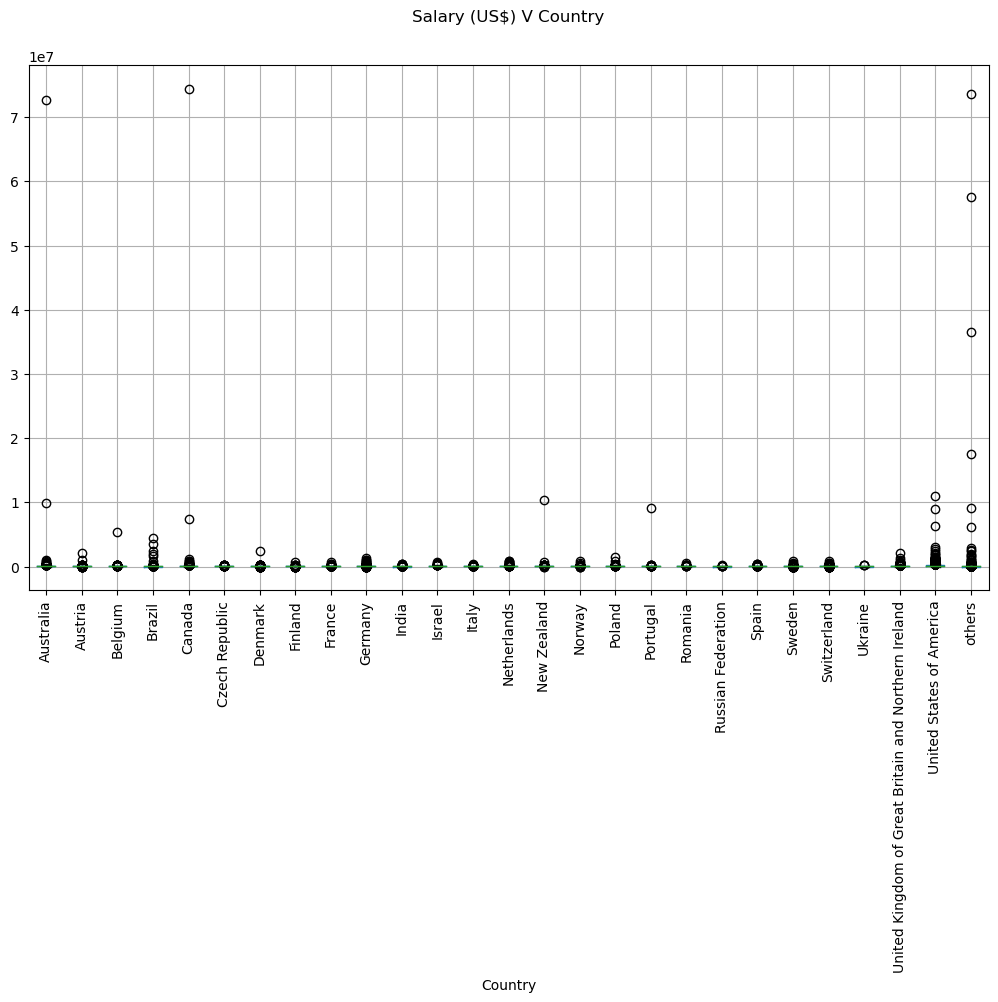

In [61]:
# Checking for outliers in the country's Salary

fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot ('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel = ('Salary')
plt.xticks(rotation=90)
plt.show()

In [62]:
df = df[df['Salary'] <= 200000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'others']

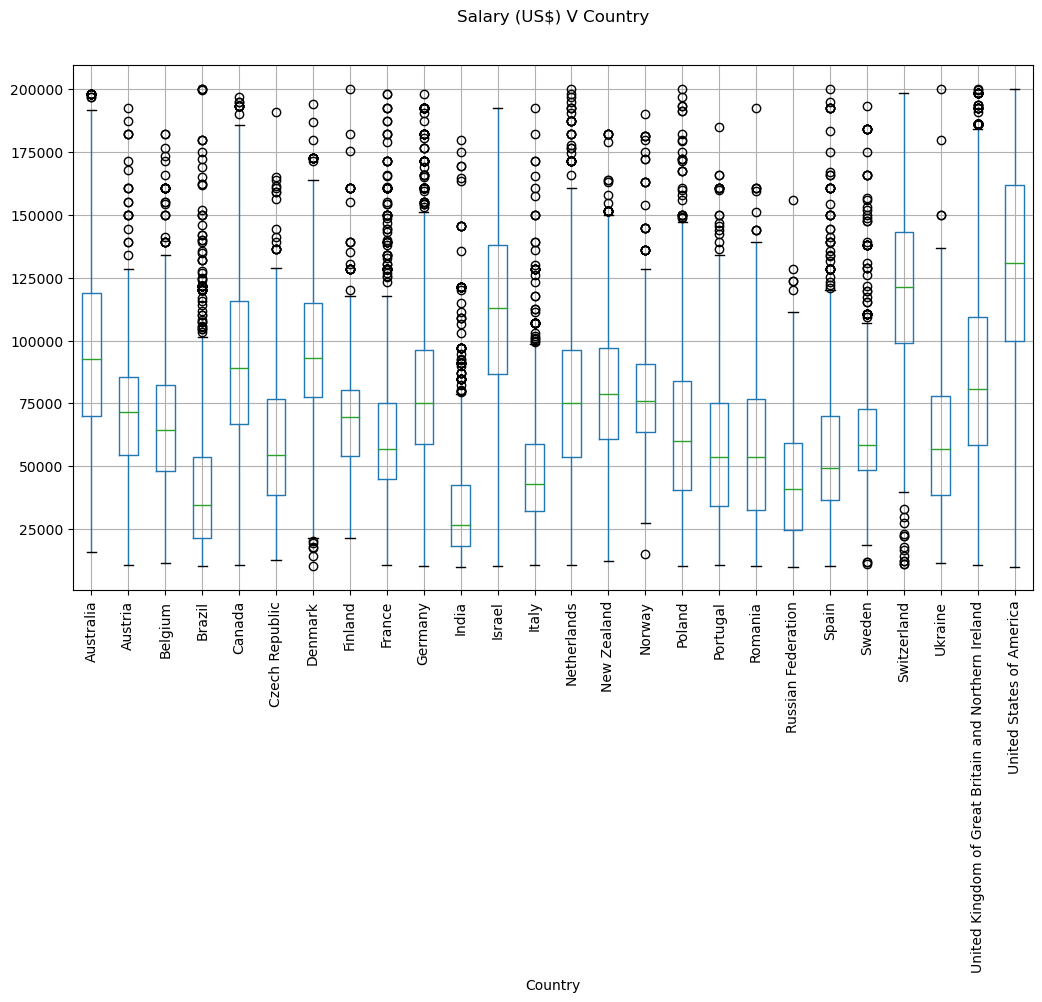

In [63]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot ('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel = ('Salary')
plt.xticks(rotation=90)
plt.show()

In [64]:
df.head(2)

,Age,EdLevel,MainBranch,DevType,Country,Industry,Employment,OrgSize,WorkExp,Worktype,YearsCode,YearsCodePro,Salary,Avgcodepro_time
3,25-34 years old,B.Sc,professional Dev,front-end,United States of America,IT,full-time,100 to 499,6 to 10,Hybrid,12,7,156000.0,5
5,35-44 years old,less than a Bachelors,professional Dev,back-end,United Kingdom of Great Britain and Northern I...,others,full-time,100 to 499,21 to 25,Remote,21,21,96828.0,0


In [65]:
df.shape

(35098, 14)

## Exploratory Data Analysis

### Univariate Analysis
##### dropping the "others" in the data for EDA

In [66]:
# Make a copy of the data frame

df_nO = df.copy()

In [67]:
# make a copy of the data having no 'others' data points

df_nO = df[~df.isin(['others']).any(axis=1)]

In [68]:
# save clean data

save_path = "C:/Users/HP/Tech_pro/prepdVisu_dataset1.csv"

# Save the DataFrame to a CSV file
df_nO.to_csv(save_path, index=False)

print(f'Data has been saved to {save_path}')

Data has been saved to C:/Users/HP/Tech_pro/prepdVisu_dataset1.csv


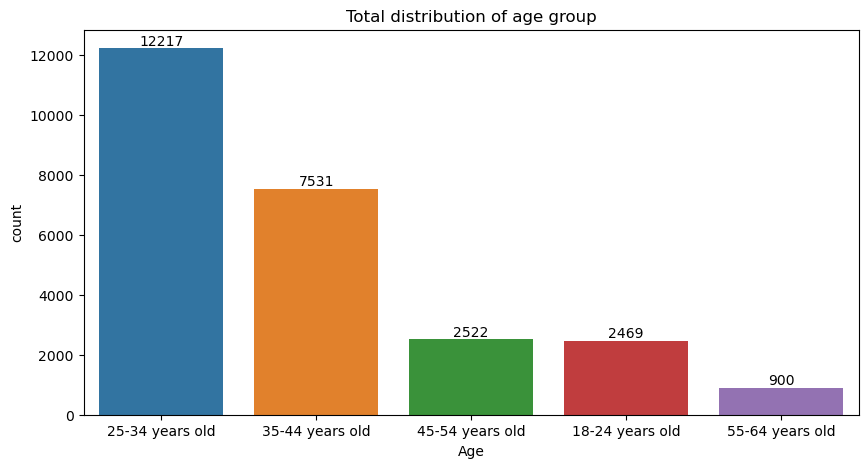

In [69]:
# Age distribution

plt.figure(figsize=(10,5))

ax = sns.countplot(x =df_nO['Age'], order=df_nO['Age'].value_counts(ascending=False).index)
plt.xlabel = ('Age group')
plt.ylabel = ('Count')
ax.bar_label(container=ax.containers[0], label='Age')
ax.set_title("Total distribution of age group");


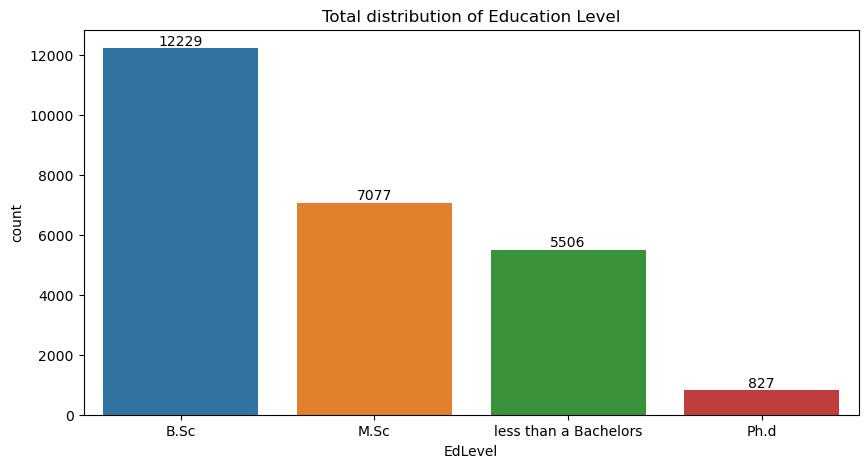

In [70]:
# Distribution of Education Level

plt.figure(figsize=(10,5))

ax = sns.countplot(x =df_nO['EdLevel'], order=df_nO['EdLevel'].value_counts(ascending=False).index)
plt.xlabel = ('Education Level')
plt.ylabel = ('Count')
ax.bar_label(container=ax.containers[0], label='EdLevel')
ax.set_title("Total distribution of Education Level");


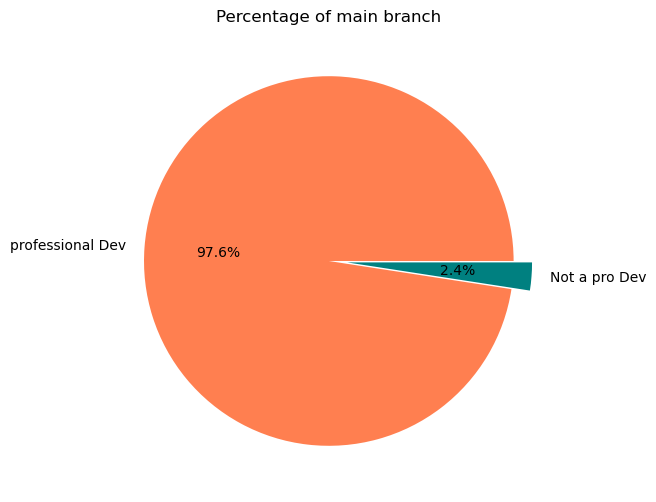

In [71]:
# Percentage of Main branch

fig,ax = plt.subplots(figsize=(6,6))

# Custom color for plots
custom_colors = ["coral", "Teal", "gray"]
sns.set_palette(custom_colors)

explode = (0, 0.1)
count = df_nO["MainBranch"].value_counts()
plt.pie(count, labels=count.index, colors=custom_colors, explode = explode, autopct = '%1.1f%%') 
ax.set_title("Percentage of main branch")
plt.show();

#### Distribution of type of developer

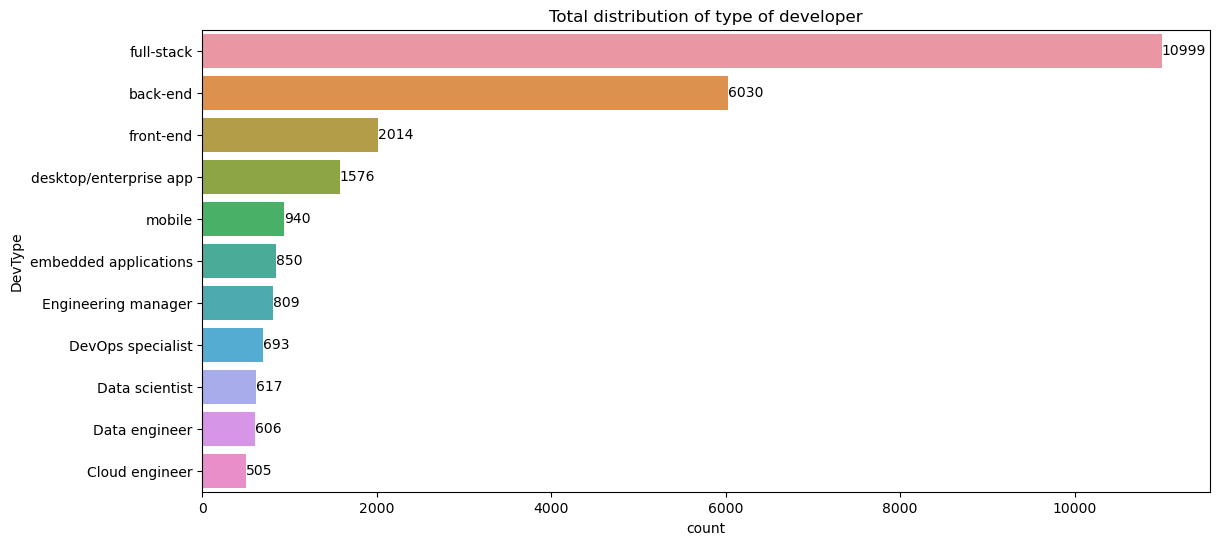

In [72]:
# drop 



plt.figure(figsize=(13,6))

ax = sns.countplot(y =df_nO['DevType'], order=df_nO['DevType'].value_counts(ascending=False).index)
plt.xlabel = ('Type of Developer')
plt.ylabel = ('Count')
ax.bar_label(container=ax.containers[0], label='DevType')
ax.set_title("Total distribution of type of developer");



#### Distribution of  top 10 country

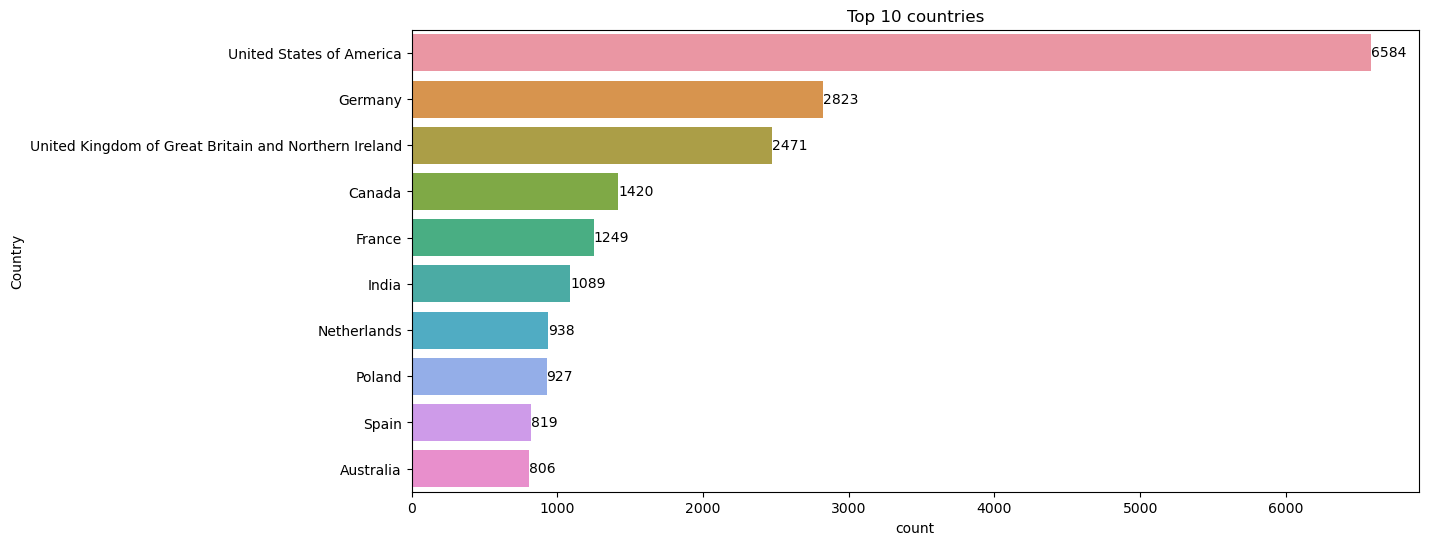

In [73]:

plt.figure(figsize=(13,6))

ax = sns.countplot(y=df_nO['Country'], order=df_nO['Country'].value_counts().head(10).index)
plt.xlabel = ('countries')
plt.ylabel = ('count')
ax.bar_label(container=ax.containers[0], label='Country')
ax.set_title ('Top 10 countries');

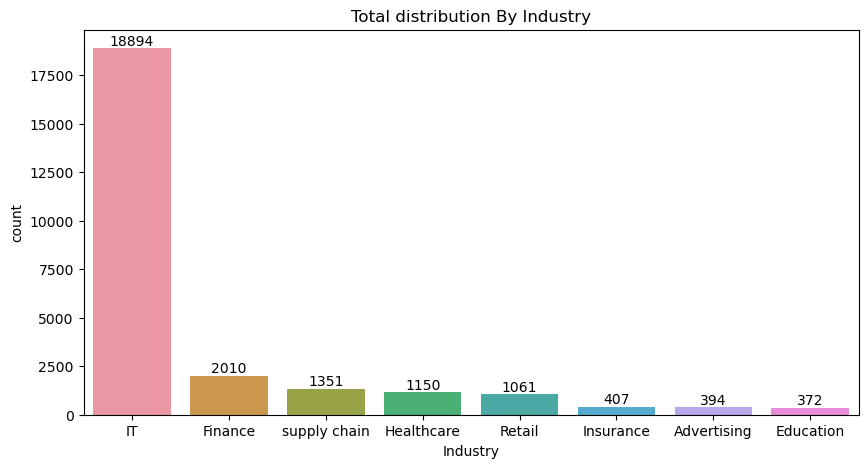

In [74]:
# Total distribution by industry

plt.figure(figsize=(10,5))

ax = sns.countplot(x =df_nO['Industry'], order=df_nO['Industry'].value_counts(ascending=False).index)
plt.xlabel = ('Industry')
plt.ylabel = ('Count')
ax.bar_label(container=ax.containers[0], label= 'Industry')
ax.set_title('Total distribution By Industry');

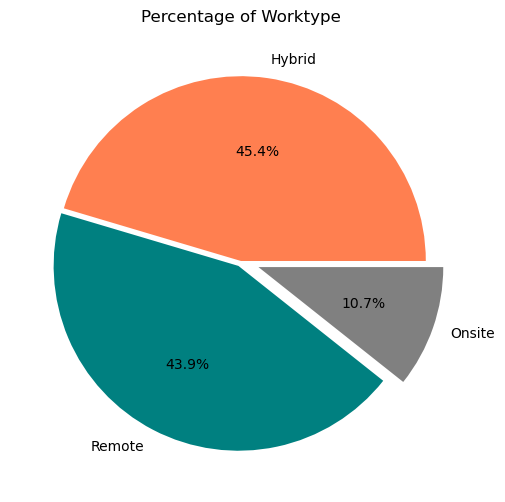

In [75]:
# Percentage of Main branch

fig,ax = plt.subplots(figsize=(6,6))

# Custom color for plots
custom_colors = ["coral", "Teal", "gray"]
sns.set_palette(custom_colors)

explode = (0, 0.03, 0.1)
count = df_nO["Worktype"].value_counts()
plt.pie(count, labels=count.index, colors=custom_colors, explode = explode, autopct = '%1.1f%%') 
ax.set_title("Percentage of Worktype")
plt.show();

## Bivariate Analysis

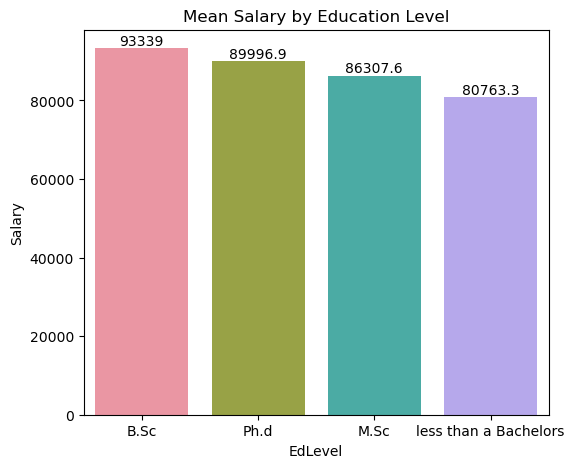

In [76]:
# Mean salary by education Level

plt.figure(figsize=(6,5))



ax = sns.barplot(x='EdLevel', y='Salary', data=df_nO, ci=None, estimator=np.mean, order=df_nO.groupby('EdLevel')['Salary'].mean().sort_values(ascending=False).index)

plt.xlabel = ('Education Level')
plt.ylabel = ('Mean Salary')
ax.set_title('Mean Salary by Education Level')
ax.bar_label(container=ax.containers[0], label= 'EdLevel')


plt.show()

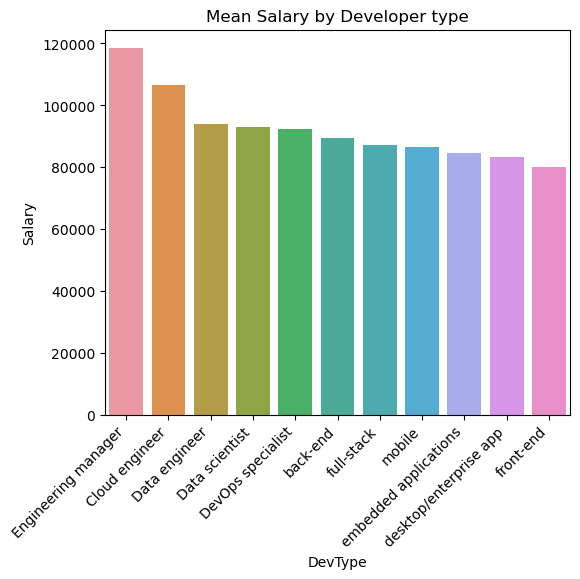

In [77]:
# Mean Salary by developer type

plt.figure(figsize=(6,5))

ax = sns.barplot(x='DevType', y='Salary', data=df_nO, ci=None, estimator=np.mean, order=df_nO.groupby('DevType')['Salary'].mean().sort_values(ascending=False).index)

plt.xlabel = ('Developer type')
plt.ylabel = ('Mean Salary')
ax.set_title('Mean Salary by Developer type')
plt.xticks(rotation=45, ha='right')

plt.show()

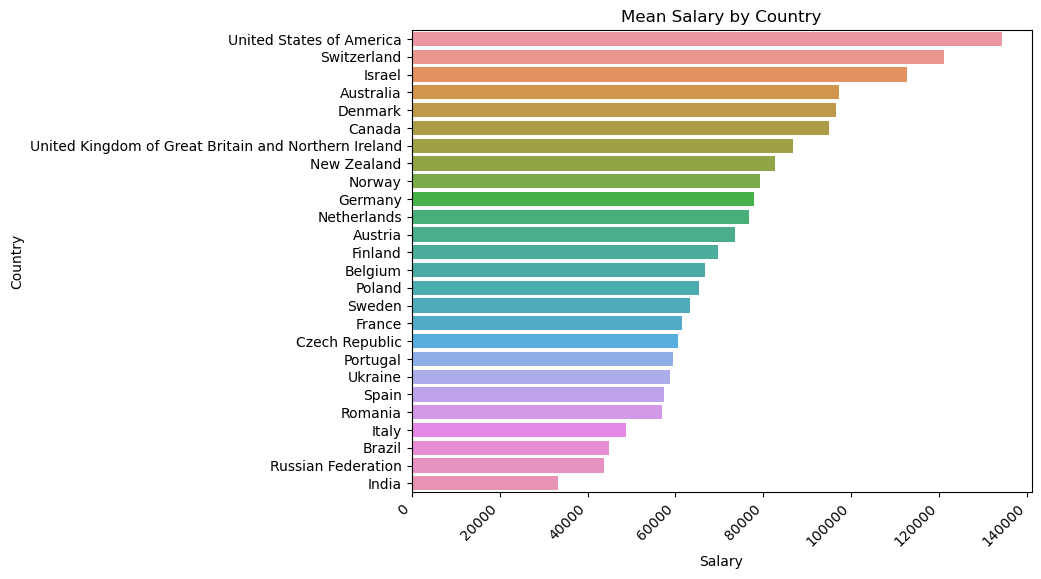

In [78]:
# Mean Salary BY Country

plt.figure(figsize=(8,6))

ax = sns.barplot(x='Salary', y='Country', data=df_nO, ci=None, estimator=np.mean, order=df_nO.groupby('Country')['Salary'].mean().sort_values(ascending=False).index)

plt.xlabel = ('Country')
plt.ylabel = ('Mean Salary')
ax.set_title('Mean Salary by Country')
plt.xticks(rotation=45, ha='right')

plt.show()

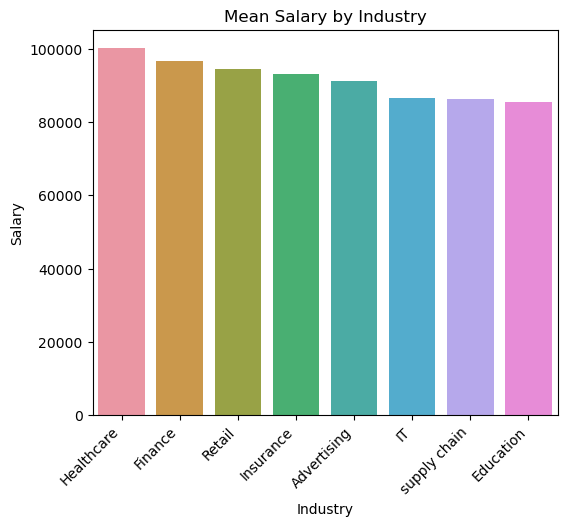

In [79]:
# Mean Salary BY Industry

plt.figure(figsize=(6,5))

ax = sns.barplot(x='Industry', y='Salary', data=df_nO, ci=None, estimator=np.mean, order=df_nO.groupby('Industry')['Salary'].mean().sort_values(ascending=False).index)

plt.xlabel = ('Industry')
plt.ylabel = ('Mean Salary')
ax.set_title('Mean Salary by Industry')
plt.xticks(rotation=45, ha='right')

plt.show()

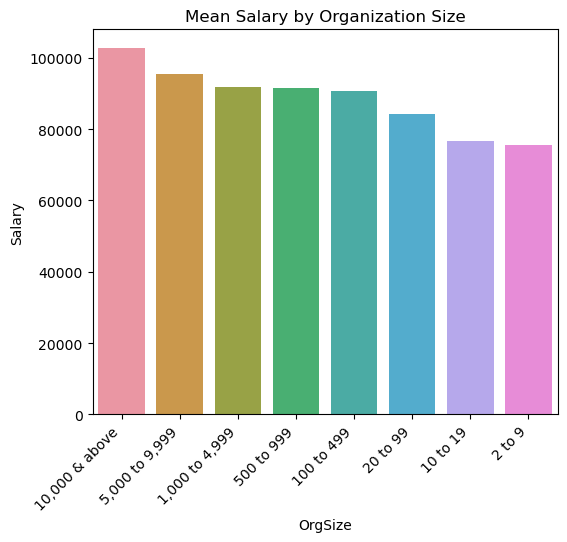

In [80]:
# Mean Salary BY Organization type

plt.figure(figsize=(6,5))

ax = sns.barplot(x='OrgSize', y='Salary', data=df_nO, ci=None, estimator=np.mean, order=df_nO.groupby('OrgSize')['Salary'].mean().sort_values(ascending=False).index)

plt.xlabel = ('Organization size')
plt.ylabel = ('Mean Salary')
ax.set_title('Mean Salary by Organization Size')
plt.xticks(rotation=45, ha='right')

plt.show()

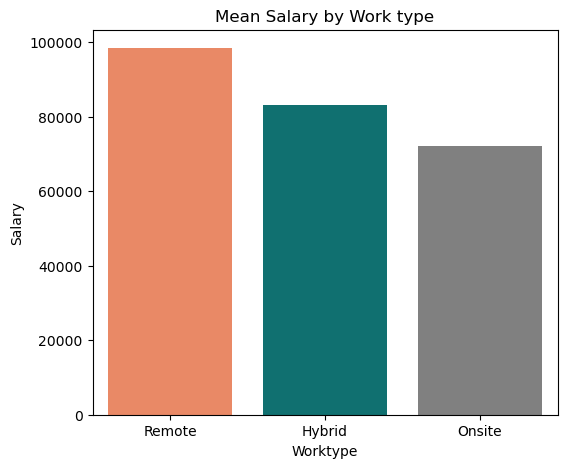

In [81]:
# Mean Salary BY Work type

plt.figure(figsize=(6,5))

ax = sns.barplot(x='Worktype', y='Salary', data=df_nO, ci=None, estimator=np.mean, order=df_nO.groupby('Worktype')['Salary'].mean().sort_values(ascending=False).index)

plt.xlabel = ('Work type')
plt.ylabel = ('Mean Salary')
ax.set_title('Mean Salary by Work type')
#plt.xticks(rotation=45, ha='right')

plt.show()

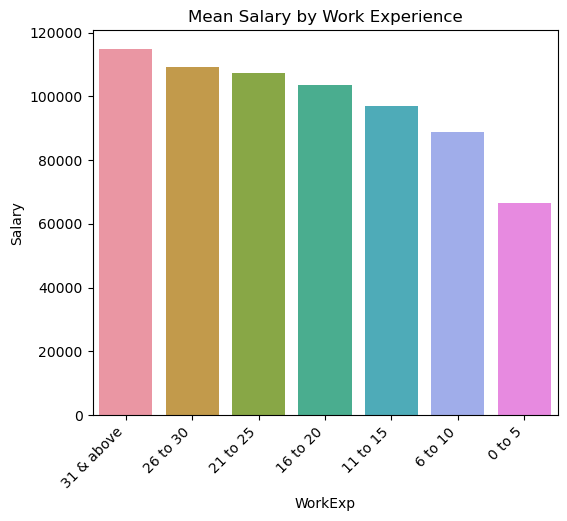

In [82]:
# Mean Salary BY Work Experience

plt.figure(figsize=(6,5))

ax = sns.barplot(x='WorkExp', y='Salary', data=df_nO, ci=None, estimator=np.mean, order=df_nO.groupby('WorkExp')['Salary'].mean().sort_values(ascending=False).index)

plt.xlabel = ('Work Experience')
plt.ylabel = ('Mean Salary')
ax.set_title('Mean Salary by Work Experience')
plt.xticks(rotation=45, ha='right')

plt.show()

### The average time taken from coding to professional coding

In [83]:
mean_avg = df_nO['Avgcodepro_time'].mean()

print(f"The average time taken to start coding professionally is: {round(mean_avg, 1)} years")

The average time taken to start coding professionally is: 4.9 years


### Multivariate Analysis

In [84]:
# make a copy of the dataFrame without the 'Others'

df_nO2 = df_nO.copy()

#copy of clean df (with 'others')
df_copy = df.copy()

#### Handling ordinal Categorical features (Age, EdLevel, OrgSize, WorkExp)

In [85]:
# Mapping ranks to Age

df_nO2.Age.unique()

array(['25-34 years old', '35-44 years old', '55-64 years old',
       '45-54 years old', '18-24 years old'], dtype=object)

In [86]:
size_map = { '18-24 years old': 0, '25-34 years old': 1, '35-44 years old': 2,
            '45-54 years old': 3, '55-64 years old': 4 }

df_nO2['Age'] = df_nO2['Age'].map(size_map )

In [87]:
# Mapping ranks to EdLevel

df_nO2.EdLevel.unique()

array(['B.Sc', 'less than a Bachelors', 'M.Sc', 'Ph.d'], dtype=object)

In [88]:
size_map = {'less than a Bachelors': 0, 'B.Sc': 1, 'M.Sc': 2, 'Ph.d': 3 }

df_nO2['EdLevel'] = df_nO2['EdLevel'].map(size_map)

In [89]:
# Mapping ranks to  OrgSize

df_nO2.OrgSize.unique()

array(['100 to 499', '1,000 to 4,999', '10 to 19', '500 to 999',
       '20 to 99', '2 to 9', '10,000 & above', '5,000 to 9,999'],
      dtype=object)

In [90]:
size_map = {'2 to 9': 0, '10 to 19': 1, '20 to 99': 2, '100 to 499': 3, '500 to 999': 4, '1,000 to 4,999':5,
            '5,000 to 9,999': 6, '10,000 & above': 7 }

df_nO2['OrgSize'] = df_nO2['OrgSize'].map(size_map)

In [91]:
# Mapping ranks to  WorkExp

df_nO2.WorkExp.unique()

array(['6 to 10', '0 to 5', '11 to 15', '16 to 20', '31 & above',
       '26 to 30', '21 to 25'], dtype=object)

In [92]:
size_map = {'0 to 5': 0, '6 to 10': 1, '11 to 15': 2, '16 to 20': 3,  '21 to 25': 4, '26 to 30': 5, '31 & above': 6  }

df_nO2['WorkExp'] = df_nO2['WorkExp'].map(size_map)

In [93]:
df_nO2.head(3)

,Age,EdLevel,MainBranch,DevType,Country,Industry,Employment,OrgSize,WorkExp,Worktype,YearsCode,YearsCodePro,Salary,Avgcodepro_time
3,1,1,professional Dev,front-end,United States of America,IT,full-time,3,1,Hybrid,12,7,156000.0,5
6,2,0,professional Dev,full-stack,United States of America,IT,full-time,5,0,Remote,4,3,135000.0,1
7,1,1,professional Dev,full-stack,United States of America,Finance,full-time,1,0,Remote,5,3,80000.0,2


### Handling Nominal Categorical columns using Label Encoder
###### MainBranch, DevType, Country, Industry, Employment, Worktyp

### Encoding categorical columns

In [94]:
le_MainBranch = LabelEncoder()

df_nO2['MainBranch'] = le_MainBranch.fit_transform(df_nO2['MainBranch'])

In [95]:
le_DevType =  LabelEncoder()

df_nO2['DevType'] = le_DevType.fit_transform(df_nO2['DevType'])


In [96]:
le_Country = LabelEncoder()

df_nO2['Country'] = le_Country.fit_transform(df_nO2['Country'])


In [97]:
le_Industry = LabelEncoder()

df_nO2['Industry'] = le_Industry.fit_transform(df_nO2['Industry'])


In [98]:
le_Employment = LabelEncoder()

df_nO2['Employment'] = le_Employment.fit_transform(df_nO2['Employment'])


In [99]:
le_Worktype = LabelEncoder()

df_nO2['Worktype'] = le_Worktype.fit_transform(df_nO2['Worktype'])

In [100]:
df_nO2.head(2)

,Age,EdLevel,MainBranch,DevType,Country,Industry,Employment,OrgSize,WorkExp,Worktype,YearsCode,YearsCodePro,Salary,Avgcodepro_time
3,1,1,1,8,25,4,1,3,1,0,12,7,156000.0,5
6,2,0,1,9,25,4,1,5,0,2,4,3,135000.0,1


In [101]:
df_nO2 = df_nO2.dropna()

In [102]:
# save clean data

save_path = "C:/Users/HP/Tech_pro/prepdML_dataset1.csv"

# Save the DataFrame to a CSV file
df_nO2.to_csv(save_path, index=False)

print(f'Data has been saved to {save_path}')

Data has been saved to C:/Users/HP/Tech_pro/prepdML_dataset1.csv


### Correlation

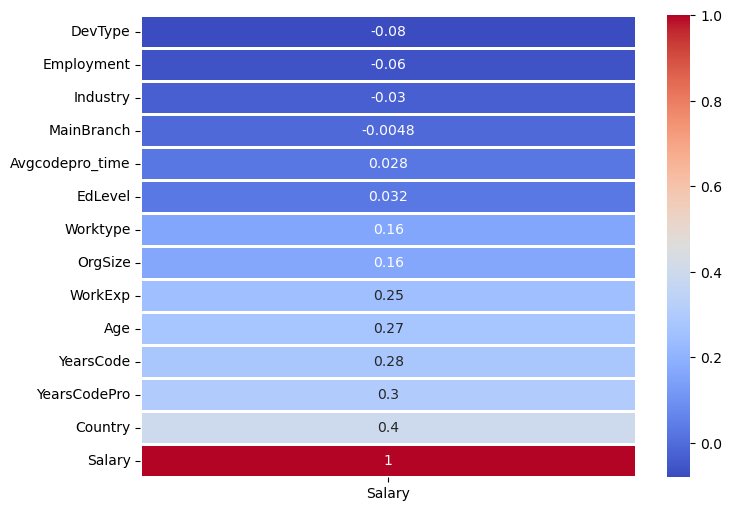

In [103]:
plt.figure(figsize=(8,6))

sns.heatmap(df_nO2.corr()[['Salary']].sort_values(by='Salary'), linewidths=1, annot=True,cmap='coolwarm');

#### Identifying features with strong correlation  ( dropping columns with corr less than 0.1)

### Model Building

In [104]:
from sklearn.linear_model import LinearRegression

lnr_reg = LinearRegression()

In [105]:
df_nO2.columns

Index(['Age', 'EdLevel', 'MainBranch', 'DevType', 'Country', 'Industry',
       'Employment', 'OrgSize', 'WorkExp', 'Worktype', 'YearsCode',
       'YearsCodePro', 'Salary', 'Avgcodepro_time'],
      dtype='object')

In [106]:
X = df_nO2.drop(['Salary', 'Age', 'Industry', 'MainBranch', 'YearsCode', 'EdLevel', 'Avgcodepro_time'],  axis='columns')

Y = df_nO2.Salary

In [107]:
# Spliiting data into training and validation set

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [108]:
#error = np.sqrt(mean_squared_error(Y, y_pred))

In [109]:
lnr_reg.fit(X_train, y_train)

LinearRegression()

In [110]:
# Predicted salary

y_pred = lnr_reg.predict(X_test)

y_pred

array([ 61040.6706036 ,  58191.20835112, 105090.38482365, ...,
        49719.5071341 ,  97565.78248467,  44202.21333666])

In [111]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$38,710.44


In [112]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=0)


In [113]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [114]:
y_pred = dec_tree.predict(X_test)


y_pred

array([ 52790.,  29985., 127500., ..., 171870.,  47862.,  42836.])

In [115]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$37,266.07


In [116]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rcf = RandomForestRegressor()


In [117]:
rcf.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
y_pred = rcf.predict(X_test)


y_pred

array([ 76254.3095    ,  44211.11904762, 121320.28583333, ...,
       106113.1697381 ,  55956.48      ,  37253.04      ])

In [119]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$30,322.81


In [120]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

Gb_mod = GradientBoostingRegressor(n_estimators=100)

In [121]:
Gb_mod.fit(X_train, y_train)

GradientBoostingRegressor()

In [122]:
y_pred = Gb_mod.predict(X_test)


y_pred

array([ 91708.35264086,  42210.41129083, 137116.02425387, ...,
        71908.30459889,  62519.08414356,  36884.4307546 ])

In [123]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$28,546.93


### Selecting the model with the least error
##### TheGradient Boosting Regressor has the least error.

In [124]:
# Selected model = Gb_mod


In [125]:
X.head(2)

,DevType,Country,Employment,OrgSize,WorkExp,Worktype,YearsCodePro
3,8,25,1,3,1,0,7
6,9,25,1,5,0,2,3


#### Testing User input .

In [126]:
user_input = np.array([['back-end', 'India', 'full-time', '500 to 999', '6 to 10', 'Hybrid', 7]])

user_input

array([['back-end', 'India', 'full-time', '500 to 999', '6 to 10',
        'Hybrid', '7']], dtype='<U11')

In [127]:
Gb_mod.fit(X_train, y_train)

GradientBoostingRegressor()

In [128]:
# Dictionary to map integer values to their corresponding string representations for each variable
variable_mappings = {
    'OrgSize': {'2 to 9': 0, '10 to 19': 1, '20 to 99': 2, '100 to 499': 3, '500 to 999': 4, '1,000 to 4,999': 5,
                '5,000 to 9,999': 6, '10,000 & above': 7},
    'WorkExp': {'0 to 5': 0, '6 to 10': 1, '11 to 15': 2, '16 to 20': 3, '21 to 25': 4, '26 to 30': 5, '31 & above': 6}
}

# Apply mappings to 'OrgSize' and 'WorkExp' columns
user_input[:, 3] = np.vectorize(variable_mappings['OrgSize'].get, otypes=[int])(user_input[:, 3])
user_input[:, 4] = np.vectorize(variable_mappings['WorkExp'].get, otypes=[int])(user_input[:, 4])


In [129]:
user_input[:, 0] = le_DevType.transform(user_input[:, 0])
user_input[:, 1] = le_Country.transform(user_input[:, 1])
user_input[:, 2] = le_Employment.transform(user_input[:, 2])
user_input[:, 5] = le_Worktype.transform(user_input[:, 5])

user_input = user_input.astype(float)
user_input

array([[ 5., 10.,  1.,  4.,  1.,  0.,  7.]])

In [130]:

# Make predictions and obtain probabilities
Salary = Gb_mod.predict(user_input)

formatted_salary = "{:,.0f}".format(Salary[0])

# Output results
print(f'The predicted Salary ${formatted_salary}')


The predicted Salary $51,449


#### Saving the model

In [131]:
# Import Pickle

import pickle

In [132]:
data = {'model': Gb_mod, 'le_DevType': le_DevType, 'le_Country': le_Country, 
        'le_Employment': le_Employment, 'le_Worktype': le_Worktype, }

with open ('Gb_mod_Salry.pkl', 'wb') as file:
    pickle.dump(data, file)

#### Loading the model

In [133]:
with open ('Gb_mod_Salry.pkl', 'rb') as file:
    data = pickle.load(file)

In [134]:
user_input = np.array([['back-end', 'United States of America', 'full-time', '500 to 999', '6 to 10', 'Hybrid', 7]])

user_input

array([['back-end', 'United States of America', 'full-time',
        '500 to 999', '6 to 10', 'Hybrid', '7']], dtype='<U24')

In [135]:
Gb_mod.fit(X_train, y_train)

GradientBoostingRegressor()

#### Encode the user input

In [136]:
# Dictionary to map integer values to their corresponding string representations for each variable
variable_mappings = {
    'OrgSize': {'2 to 9': 0, '10 to 19': 1, '20 to 99': 2, '100 to 499': 3, '500 to 999': 4, '1,000 to 4,999': 5,
                '5,000 to 9,999': 6, '10,000 & above': 7},
    'WorkExp': {'0 to 5': 0, '6 to 10': 1, '11 to 15': 2, '16 to 20': 3, '21 to 25': 4, '26 to 30': 5, '31 & above': 6}
}

# Apply mappings to 'OrgSize' and 'WorkExp' columns
user_input[:, 3] = np.vectorize(variable_mappings['OrgSize'].get, otypes=[int])(user_input[:, 3])
user_input[:, 4] = np.vectorize(variable_mappings['WorkExp'].get, otypes=[int])(user_input[:, 4])


user_input[:, 0] = le_DevType.transform(user_input[:, 0])
user_input[:, 1] = le_Country.transform(user_input[:, 1])
user_input[:, 2] = le_Employment.transform(user_input[:, 2])
user_input[:, 5] = le_Worktype.transform(user_input[:, 5])

user_input = user_input.astype(float)
user_input


array([[ 5., 25.,  1.,  4.,  1.,  0.,  7.]])

In [137]:
# Make predictions and obtain probabilities
Salary = Gb_mod.predict(user_input)

formatted_salary = "{:,.0f}".format(Salary[0])

# Output results
print(f'The predicted Salary ${formatted_salary}')


The predicted Salary $146,434
